## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(mouse_metadata.value_counts("Mouse ID"))

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = merge_df[merge_df.duplicated()]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merge_df.drop_duplicates()
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df.value_counts("Mouse ID"))

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
grouped_drug_df = cleaned_df.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean1 = grouped_drug_df["Tumor Volume (mm3)"].mean()
median1 = grouped_drug_df["Tumor Volume (mm3)"].median()
var1 = grouped_drug_df["Tumor Volume (mm3)"].var()
std1 = grouped_drug_df["Tumor Volume (mm3)"].std()
sem1 = grouped_drug_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean Tumor Volume (mm3)": mean1,
                           "Median Tumor Volume (mm3)": median1,
                           "Variance": var1,
                           "Standard Deviation": std1,
                           "SEM": sem1})
summary_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_df = grouped_drug_df.agg(Mean_Tumor_Volume = ('Tumor Volume (mm3)','mean'),
                                     Median_Tumor_Volume = ('Tumor Volume (mm3)','median'),
                                     Variance = ('Tumor Volume (mm3)','var'),
                                     Standard_Deviation = ('Tumor Volume (mm3)','std'),
                                     SEM = ('Tumor Volume (mm3)','sem'))
summary_agg_df

,Mean_Tumor_Volume,Median_Tumor_Volume,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

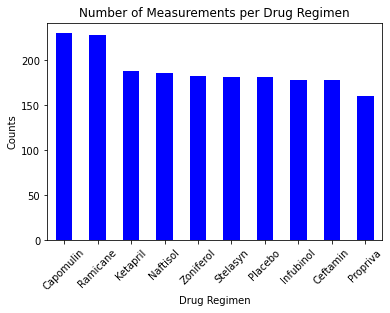

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_counts = cleaned_df.value_counts("Drug Regimen")
pd_bar = drug_counts.plot(kind='bar', rot=45, color='blue')
pd_bar.set_ylabel("Counts")
pd_bar.set_title("Number of Measurements per Drug Regimen")
plt.show(pd_bar)

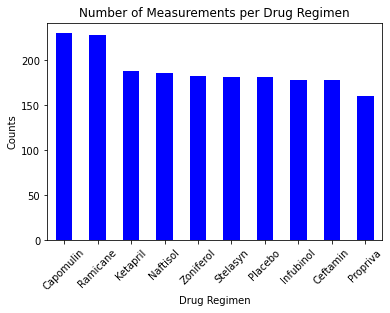

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(drug_counts.index, drug_counts, color='b', width=0.5, align="center")
plt.xticks(rotation=45)
plt.xlim(-0.5,9.5)
plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Counts")
plt.show()

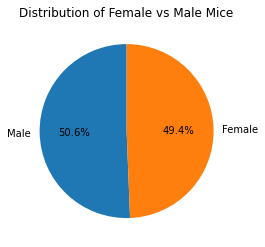

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_counts = cleaned_df.value_counts("Sex")
pd_pie = sex_counts.plot(kind='pie', autopct="%1.1f%%", startangle=90)
pd_pie.set_title("Distribution of Female vs Male Mice")
pd_pie.set_ylabel("")
plt.show(pd_pie)

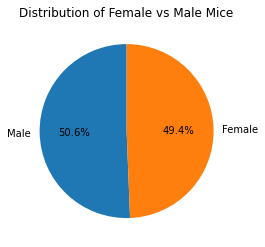

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_counts, labels = sex_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Female vs Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = cleaned_df.groupby("Mouse ID").max("Timepoint")

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_df = pd.merge(cleaned_df, max_timepoint_df["Timepoint"], on=["Mouse ID", "Timepoint"])
final_tumor_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_rows = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == treatment]
    tumor_vol_data.append(drug_rows["Tumor Volume (mm3)"])

    # add subset
iqr = []
lower_bounds = []
upper_bounds = []
for i in range(len(treatments)):
    quartiles = tumor_vol_data[i].quantile([0.25,0.5,0.75])
    quartiles.append(quartiles)
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr.append(upperq - lowerq)
    lower_bounds.append(lowerq - (1.5*iqr[i]))
    upper_bounds.append(upperq + (1.5*iqr[i]))
    
    # Determine outliers using upper and lower bounds
    print(f"Tumor volumes below {round(lower_bounds[i],2)} mm3 and above {round(upper_bounds[i],2)} mm3 could be outliers for {treatments[i]}.")

    # for i in range(len(treatments)):
    #     rows = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == treatments[i]]
    #     print(rows.loc[(rows['Tumor Volume (mm3)'] < lower_bounds[i]) | (rows['Tumor Volume (mm3)'] > upper_bounds[i])])
c326 = final_tumor_df.loc[final_tumor_df["Mouse ID"] == "c326"]
c326

Tumor volumes below 20.7 mm3 and above 51.83 mm3 could be outliers for Capomulin.
Tumor volumes below 17.91 mm3 and above 54.31 mm3 could be outliers for Ramicane.
Tumor volumes below 36.83 mm3 and above 82.74 mm3 could be outliers for Infubinol.
Tumor volumes below 25.36 mm3 and above 87.67 mm3 could be outliers for Ceftamin.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
74,c326,Infubinol,Female,18,25,5,36.321346,0


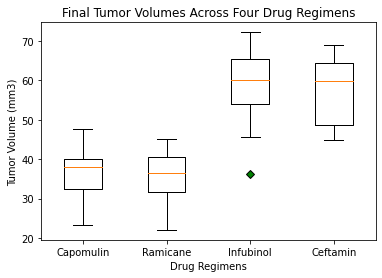

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes Across Four Drug Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimens')
ax1.boxplot(tumor_vol_data, flierprops = dict(markerfacecolor='g', marker='D'))
ax1.set_xticklabels(treatments)
plt.show()

## Line and Scatter Plots

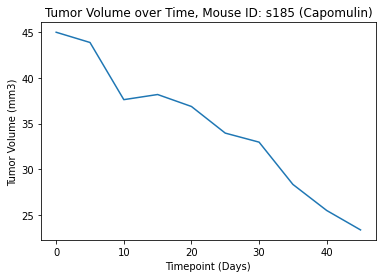

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s185 = cleaned_df.loc[cleaned_df["Mouse ID"] == "s185"]
plt.plot(s185["Timepoint"], s185["Tumor Volume (mm3)"])
plt.title("Tumor Volume over Time, Mouse ID: s185 (Capomulin)")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

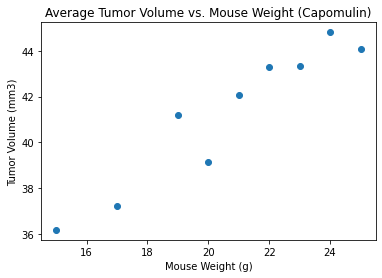

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]
weight_group = Capomulin.groupby("Weight (g)").mean()

plt.scatter(weight_group.index, weight_group["Tumor Volume (mm3)"])
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

Correlation coefficient: 0.95
Linear regression model: y = 0.89x + 22.76


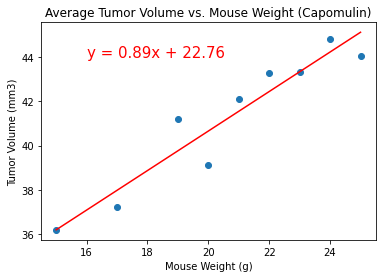

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(weight_group.index, weight_group["Tumor Volume (mm3)"])
print(f'Correlation coefficient: {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight_group.index, weight_group["Tumor Volume (mm3)"])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'Linear regression model: {line_eq}')

plt.scatter(weight_group.index, weight_group["Tumor Volume (mm3)"])
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin)")
regress_values = weight_group.index * slope + intercept
plt.plot(weight_group.index,regress_values,"r-")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.annotate(line_eq,(16,44),fontsize=15,color="red")
plt.show()